In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
from datos import Datos
from estrategiasparticionado.validacion_cruzada import ValidacionCruzada
from estrategiasparticionado.validacion_simple import ValidacionSimple

dataset=Datos('./conjunto_datos/tic-tac-toe.data')
dataset2=Datos('./conjunto_datos/german.data')
dataset.datos[:,[1, -1]]

array([[ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       ..., 
       [ 2.,  0.],
       [ 2.,  0.],
       [ 1.,  0.]])

In [2]:
validacionSimple = ValidacionSimple()
validacionSimple.creaParticiones(dataset.datos)
for particion in validacionSimple.particiones:
    print(particion.indicesTrain)
    print(particion.indicesTest)

[695   0  32 556 678 786 745 343 848 409 146  80 519 895 837  27 396 111
 581 378 332 141 350 322 222 473 195 405 102 699 456  76 498 729 145 910
 364 165 881 144 431  34 527 899 399 235 549 376 385 236 798  79 533 215
 610  25 621  12 931 827 232 346 291 863 842 182 725 200 284 751  72 624
  59 302 393 667  35   2 776 845 370 666 767 303 338 244 386 865 205 247
 298 844 139 413 815 715  14 116 650  50 903 226 306 623 787 953  65 107
 576 885 884 221 403 850 511 679 954 789 937 108 336 721 734 412 887 838
 439 605 829 483 437 217 229 577 951 683 516 170 227 470 720 321 654 223
 686 807 802 739 282 933 219 646 691 501 468 441  63  54 173 875 248 436
 664 943  64 820 810 319 354 256 780 703  42 106 452 559 391 271 418 642
 794 476 270 670  92 915 320 243 285 714 280 816 818 627 935  73 127 355
 194 264 930 463 950 889 497 671 555 938 641 329  45 454  87 940 514 210
  40 164 841 913 211 630  44 374 728 481 585 639 669 819 685 638 942 274
 446  55 357 233 904 526 948 455 448 708 316 955 70

In [3]:
validacionCruzada = ValidacionCruzada()

validacionCruzada.creaParticiones(dataset.datos)

    
validacionCruzada.particiones[0].indicesTrain

array([356,  13, 906, 569, 650,   5, 271, 263, 299, 465, 870, 103, 156,
       372, 210, 864, 290, 174, 619, 178, 872, 205,  12, 331, 504, 280,
       334, 525, 353,  66, 617, 887, 477, 560, 223, 443, 285,  63, 940,
        80, 407, 165, 839, 190, 691, 570, 738, 124, 370, 462, 557,  24,
       565, 333, 454, 905, 411, 634, 885, 597, 309, 599, 250, 397, 241,
       138, 776, 654, 415, 440, 632, 456, 383, 484, 390, 252,  67, 916,
       577, 109, 154, 917, 189, 300, 229, 912, 278, 282, 566, 206,  72,
       955, 894,  68, 785, 930, 512, 273, 507, 392, 562, 466, 743,  23,
        95, 852, 714, 294, 469, 337,  33,  14, 866, 347, 501, 708, 317,
       716, 403, 635, 621, 157, 291, 455, 947,  16, 712, 763, 394, 114,
       663, 493, 750, 626, 719, 100, 904, 253, 201, 167,  64, 306, 235,
       233, 587, 892, 330, 875, 848, 131, 364, 524, 549, 874, 953, 151,
       741, 748, 579, 934, 935, 645, 376, 439,  37, 318, 853, 324, 643,
       489, 388, 764, 160,  82, 804, 811, 480, 926, 361,  83, 90

In [4]:
dataset.extraeDatosTrain(0)

array([ 2.,  2.,  2.,  2.,  1.,  1.,  2.,  1.,  1.,  1.])

In [83]:
import numpy as np
from datos import Datos
from estrategiasparticionado.validacion_cruzada import ValidacionCruzada
from estrategiasparticionado.validacion_simple import ValidacionSimple
from clasificadores.clasificador_vecinos_proximos import ClasificadorVecinosProximos

dataset=Datos('./conjunto_datos/example4.data')
dataset.datos
clasificador = ClasificadorVecinosProximos()


res = clasificador.validacion(validacionSimple, dataset)
print(clasificador.errores)
print(clasificador.tramo_1)
print(clasificador.tramo_2)
print(clasificador.tramo_3)

[0.02857142857142857]
0.024539000000018518
0.0007069999999629317
0.0016669999999834317


In [75]:
clasificador = ClasificadorVecinosProximos()
res = clasificador.validacion(validacionSimple, dataset)

[0.017857142857142856]
0.33511900000000594
0.004947000000157686
0.006254999999910638


Error de ./conjunto_datos/example1.data: [0.48214285714285715]
Error de ./conjunto_datos/example2.data: [0.0]
Error de ./conjunto_datos/example3.data: [0.010714285714285714]
Error de ./conjunto_datos/example4.data: [0.02857142857142857]


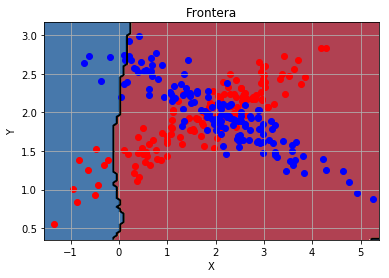

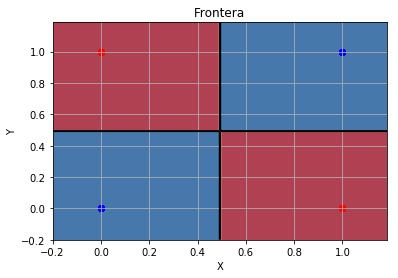

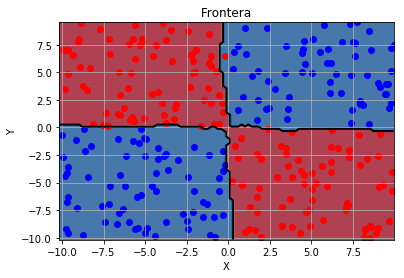

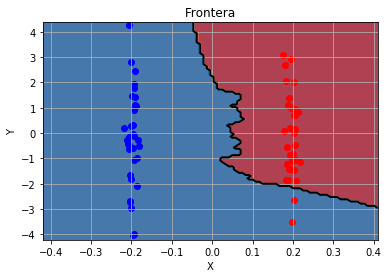

In [21]:
from plotModel import plotModel
import matplotlib.pyplot as plt
%matplotlib inline
clasificador = ClasificadorVecinosProximos()

for i in range(1, 5):
    dataset=Datos('./conjunto_datos/example%d.data' % i)
    res = clasificador.validacion(validacionSimple, dataset)
    estrategia = ValidacionSimple()
    estrategia.creaParticiones(dataset.datos)
    ii = estrategia.particiones[-1].indicesTrain
    plt.figure()
    plotModel(dataset.datos[ii,0],dataset.datos[ii,1],dataset.datos
    [ii,-1]!=0,clasificador,"Frontera",dataset.diccionarios)
    print('Error de ./conjunto_datos/example%d.data: %s'% (i, clasificador.errores))